In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('../all_var_int.csv')
df.describe()

,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,total_reg_workers,women_reg_workers,num_of_active_job_cards,num_joint_acc_of_women,num_total_acc_of_women,num_women_beneficiary_worker_with_acc,num_women_beneficiary_active_worker_with_acc,tot_expenditure,tot_mandays,gw_stge_of_extraction
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5175.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,41076.712468,19873.782287,12602.858469,2408.266724,16449.579536,15557.887360,10773.214961,4319.087704,6.884994e+07,-456.060553
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,34379.827770,16262.322561,9007.231548,5387.560594,13534.272569,12013.081666,9030.064504,4116.178693,7.488405e+07,6975.643425
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-100000.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,19194.500000,9094.000000,6537.000000,120.000000,7428.500000,7527.000000,4787.000000,1477.500000,2.053185e+07,32.974058
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,30669.000000,15226.000000,10218.000000,551.000000,12281.000000,12078.000000,8107.000000,3172.000000,4.624726e+07,56.728903
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,51225.500000,25712.000000,16414.000000,2025.500000,21535.000000,20399.000000,13925.500000,5798.500000,9.129770e+07,76.093358
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,359381.000000,158219.000000,78340.000000,75184.000000,120982.000000,97587.000000,82105.000000,55644.000000,1.021685e+09,474.955968


In [2]:
PandH = ['total_households', 'total_population', 'hh_kutcha_wall_roof']
SocialGroups = ['sc_population', 'st_population', 'gen_population']
HandN = ["anaemic_pregnant_women", "anaemic_adolescent_girls"]
livelihood_factors = ["hh_non_farm_activities","tot_area_unirrigated"]
cropVlunerability = ['cdi_value', 'crp_sq_km']
common_cols = ["block_code", "FID_Key", "total_villages", "geog_area"]

In [3]:
flood_df = df[common_cols+HandN+SocialGroups+PandH+cropVlunerability+livelihood_factors]

In [4]:
flood_df['crp_vul_index'] = (flood_df['crp_sq_km'] / flood_df['geog_area']) * (1 / (1 + flood_df['cdi_value']))
flood_df.drop(columns=['cdi_value', 'crp_sq_km'], inplace=True)

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_9819/3569615677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_df['crp_vul_index'] = (flood_df['crp_sq_km'] / flood_df['geog_area']) * (1 / (1 + flood_df['cdi_value']))
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_9819/3569615677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_df.drop(columns=['cdi_value', 'crp_sq_km'], inplace=True)


In [5]:
flood_df.columns

Index(['block_code', 'FID_Key', 'total_villages', 'geog_area',
       'anaemic_pregnant_women', 'anaemic_adolescent_girls', 'sc_population',
       'st_population', 'gen_population', 'total_households',
       'total_population', 'hh_kutcha_wall_roof', 'hh_non_farm_activities',
       'tot_area_unirrigated', 'crp_vul_index'],
      dtype='object')

In [6]:
flood_df.loc[df['total_villages'].isna(), 'total_villages'] = 74

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
robust_scaling_col = ['anaemic_pregnant_women', 'anaemic_adolescent_girls', 'sc_population',
       'st_population', 'gen_population', 'total_households',
       'total_population', 'hh_kutcha_wall_roof', 'hh_non_farm_activities',
       'tot_area_unirrigated']

df_scaled = flood_df.copy()

df_scaled[robust_scaling_col] = scaler.fit_transform(df_scaled[robust_scaling_col])

In [8]:
df_pca = df_scaled.drop(columns=['block_code', 'FID_Key','total_villages', 'geog_area'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [9]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)



,% variance,Cumulative %
0,0.387,0.387
1,0.265,0.652
2,0.128,0.781
3,0.103,0.883
4,0.040,0.924
5,0.031,0.955
6,0.021,0.976
7,0.015,0.991
8,0.005,0.996
9,0.003,1.000


In [10]:
PCA_weights = pcaSummary_df['% variance'][:4]

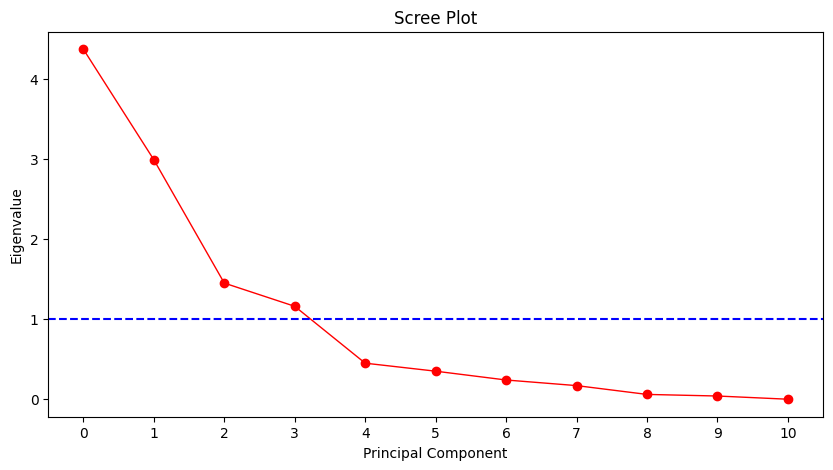

In [11]:
import matplotlib.pyplot as plt

# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [12]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=4)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(4)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                               PC1       PC2       PC3       PC4
anaemic_pregnant_women    0.238031 -0.264383 -0.171334  0.321557
anaemic_adolescent_girls  0.323177 -0.280102 -0.255424  0.676449
sc_population             0.057936 -0.324745 -0.004588 -0.229179
st_population             0.774397  0.536960 -0.137171 -0.222899
gen_population            0.074539 -0.339385  0.004788 -0.149601
total_households          0.198839 -0.325191 -0.013101 -0.217749
total_population          0.171352 -0.312730 -0.041844 -0.162443
hh_kutcha_wall_roof       0.280376 -0.120520  0.024251 -0.038528
hh_non_farm_activities    0.137217 -0.344721 -0.037466 -0.453769
tot_area_unirrigated      0.252839 -0.075058  0.939427  0.182304
crp_vul_index            -0.005400 -0.011679 -0.010297  0.001234


In [13]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Flood_Sensitivity_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   block_code  FID_Key  total_villages   geog_area  anaemic_pregnant_women  \
0        6498        1             7.0  1199.52279               -0.586239   
1        6492        4            82.0  1505.90407               -0.522149   
2        4689       56            30.0   290.78289               -0.028275   
3        4690       57            17.0   294.23585               -0.456173   
4        4692       58            19.0   339.99146               -0.222432   

   anaemic_adolescent_girls  sc_population  st_population  gen_population  \
0                 -0.481949      -0.714365      -0.119392       -0.836233   
1                 -0.435018      -0.714365      -0.159665       -0.539948   
2                  0.064982      -0.113952       0.083911        0.171953   
3                 -0.252708      -0.517782       0.096632       -0.609594   
4                  0.521661      -0.388068       0.077522       -0.566514   

   total_households  total_population  hh_kutcha_wall_roof  \
0     

In [14]:
# Multiply each PCA component score by its weight
df["Flood_Sensitivity_Index"] = (
    PCA_weights[0] * df_scaled["Flood_Sensitivity_PC1"] +
    PCA_weights[1] * df_scaled["Flood_Sensitivity_PC2"] +
    PCA_weights[2] * df_scaled["Flood_Sensitivity_PC3"] +
    PCA_weights[3] * df_scaled["Flood_Sensitivity_PC4"]
)

# Display the flood_exposure Index
print(df[["block_code", "Flood_Sensitivity_Index"]].head())

   block_code  Flood_Sensitivity_Index
0        6498                -0.421587
1        6492                -0.368972
2        4689                -0.513235
3        4690                 0.118661
4        4692                 0.091183


In [15]:
df["Flood_Sensitivity_Index"].describe()

count    5815.000000
mean        0.000000
std         0.949049
min        -1.732751
25%        -0.546800
50%        -0.306846
75%         0.207993
max        10.403237
Name: Flood_Sensitivity_Index, dtype: float64